In [1]:
%matplotlib inline
from pathlib import Path

datasets_path = Path("../datasets")

In [2]:
import polars as pl
import polars.selectors as cs

train_csv_path = datasets_path / "train.csv"
test_csv_path = datasets_path / "test.csv"

train_df = pl.read_csv(train_csv_path)
test_df = pl.read_csv(test_csv_path).with_columns(pl.lit(None).alias("charges"))
merged_df = pl.concat([train_df, test_df])

In [3]:
train_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",1600.0,1600.0,"""1600""",1600.0,1600.0,"""1600""","""1600""",1600.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",1007.8625,38.985,null,32.424376,1.014375,null,null,0.30625
"""std""",575.26841,13.555012,null,5.766915,1.259031,null,null,0.628656
"""min""",0.0,18.0,"""female""",20.627626,0.0,"""no""","""northeast""",0.0
"""25%""",516.0,27.0,null,28.638079,0.0,null,null,0.0
"""50%""",1011.0,40.0,null,32.270707,1.0,null,null,0.0
"""75%""",1509.0,50.0,null,37.066816,2.0,null,null,0.0
"""max""",1999.0,64.0,"""male""",47.290644,5.0,"""yes""","""southwest""",2.0


In [4]:
test_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",400.0,400.0,"""400""",400.0,400.0,"""400""","""400""",0.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",400.0
"""mean""",966.05,39.23,null,32.668659,0.9425,null,null,null
"""std""",585.848127,12.990149,null,5.9328,1.219801,null,null,null
"""min""",13.0,18.0,"""female""",21.848978,0.0,"""no""","""northeast""",null
"""25%""",432.0,28.0,null,28.712189,0.0,null,null,null
"""50%""",972.0,40.0,null,32.288571,0.0,null,null,null
"""75%""",1458.0,50.0,null,37.110462,2.0,null,null,null
"""max""",1995.0,64.0,"""male""",46.890354,5.0,"""yes""","""southwest""",null


In [5]:
merged_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",2000.0,2000.0,"""2000""",2000.0,2000.0,"""2000""","""2000""",1600.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",400.0
"""mean""",999.5,39.034,null,32.473233,1.0,null,null,0.30625
"""std""",577.494589,13.4411,null,5.799794,1.251312,null,null,0.628656
"""min""",0.0,18.0,"""female""",20.627626,0.0,"""no""","""northeast""",0.0
"""25%""",500.0,27.0,null,28.645793,0.0,null,null,0.0
"""50%""",1000.0,40.0,null,32.275964,1.0,null,null,0.0
"""75%""",1499.0,50.0,null,37.092476,2.0,null,null,0.0
"""max""",1999.0,64.0,"""male""",47.290644,5.0,"""yes""","""southwest""",2.0


## 特徴量の生成

### bmi

In [6]:
# https://www.e-healthnet.mhlw.go.jp/information/food/e-02-001.html

bmi_col = pl.col("bmi")
bmi_enum = pl.Enum(
    [
        "Underweight",
        "Normal range",
        "Pre-obese",
        "Obese class I",
        "Obese class II",
        "Obese class III",
    ]
)
bmi_class = merged_df.select(
    pl.when(bmi_col < 18.5)
    .then(pl.lit("Underweight"))
    .when(bmi_col < 25.0)
    .then(pl.lit("Normal range"))
    .when(bmi_col < 30.0)
    .then(pl.lit("Pre-obese"))
    .when(bmi_col < 35.0)
    .then(pl.lit("Obese class I"))
    .when(bmi_col < 40.0)
    .then(pl.lit("Obese class II"))
    .otherwise(pl.lit("Obese class III"))
    .cast(pl.Categorical)
    .alias("bmi_class")
)

bmi_mean_diff = merged_df.select((bmi_col.mean() - bmi_col).alias("bmi_mean_diff"))
bmi_std_diff = merged_df.select((bmi_col.std() - bmi_col).alias("bmi_std_diff"))
bmi_std_score = merged_df.select(
    ((bmi_col - bmi_col.mean()) / bmi_col.std()).alias("bmi_std_score")
)
# bmi_ewm_std = merged_df.select(bmi_col.ewm_std().alias("bmi_ewm_std"))

bmi_square = merged_df.select((bmi_col * bmi_col).alias("bmi_square"))

/tmp/ipykernel_90291/1066528708.py:14: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  bmi_class = merged_df.select(


### 年齢

In [7]:
# http://jaee.umin.jp/doc/agegroup.pdf

age_col = pl.col("age")

age_enum = pl.Enum(
    [
        "infant",
        "lower_elementary",
        "higher_elementary",
        "junior_high",
        "senior_high",
        "young_adult",
        "old_adult",
        "young_elder",
        "old_elder",
    ]
)
age_class = merged_df.select(
    pl.when(age_col < 6)
    .then(pl.lit("infant"))
    .when(age_col < 9)
    .then(pl.lit("lower_elementary"))
    .when(age_col < 12)
    .then(pl.lit("higher_elementary"))
    .when(age_col < 15)
    .then(pl.lit("junior_high"))
    .when(age_col < 18)
    .then(pl.lit("senior_high"))
    .when(age_col < 39)
    .then(pl.lit("young_adult"))
    .when(age_col < 64)
    .then(pl.lit("old_adult"))
    .when(age_col < 74)
    .then(pl.lit("young_elder"))
    .otherwise(pl.lit("old_elder"))
    .cast(pl.Categorical)
    .alias("age_class")
)

age_mean_diff = merged_df.select((age_col.mean() - age_col).alias("age_mean_diff"))
age_std_diff = merged_df.select((age_col.std() - age_col).alias("age_std_diff"))
age_std_score = merged_df.select(
    ((age_col - age_col.mean()) / age_col.std()).alias("age_std_score")
)
# age_ewm_std = merged_df.select(age_col.ewm_std().alias("age_ewm_std"))

age_square = merged_df.select((age_col * age_col).alias("age_square"))

In [8]:
all_data = pl.concat(
    [
        merged_df,
        bmi_class,
        bmi_mean_diff,
        bmi_std_diff,
        bmi_std_score,
        bmi_square,
        age_class,
        age_mean_diff,
        age_std_diff,
        age_std_score,
        age_square,
    ],
    how="horizontal",
).with_columns(cs.string().cast(pl.Categorical))

all_data

id,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_std_score,bmi_square,age_class,age_mean_diff,age_std_diff,age_std_score,age_square
i64,i64,cat,f64,i64,cat,cat,i64,cat,f64,f64,f64,f64,cat,f64,f64,f64,i64
0,26,"""male""",32.665465,3,"""no""","""southeast""",0,"""Obese class I""",-0.192232,-26.865671,0.033145,1067.032581,"""young_adult""",13.034,-12.5589,-0.969712,676
1,41,"""male""",29.798725,1,"""no""","""southwest""",0,"""Pre-obese""",2.674508,-23.998931,-0.461138,887.963996,"""old_adult""",-1.966,-27.5589,0.146268,1681
2,28,"""male""",32.722029,0,"""yes""","""northwest""",1,"""Obese class I""",-0.248796,-26.922235,0.042897,1070.731191,"""young_adult""",11.034,-14.5589,-0.820915,784
3,20,"""female""",38.429831,2,"""no""","""southeast""",0,"""Obese class II""",-5.956598,-32.630037,1.027036,1476.85191,"""young_adult""",19.034,-6.5589,-1.416104,400
4,45,"""female""",29.641854,1,"""no""","""northwest""",0,"""Pre-obese""",2.831379,-23.84206,-0.488186,878.639491,"""old_adult""",-5.966,-31.5589,0.443862,2025
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1968,47,"""female""",24.91598,1,"""no""","""northwest""",null,"""Normal range""",7.557252,-19.116187,-1.303021,620.806079,"""old_adult""",-7.966,-33.5589,0.59266,2209
1972,18,"""female""",44.752922,0,"""no""","""southeast""",null,"""Obese class III""",-12.279689,-38.953128,2.117263,2002.824048,"""young_adult""",21.034,-4.5589,-1.564902,324
1979,33,"""female""",37.203015,0,"""yes""","""southeast""",null,"""Obese class II""",-4.729783,-31.403222,0.815509,1384.064357,"""young_adult""",6.034,-19.5589,-0.448922,1089


In [9]:
categorical_features = (
    all_data.select(
        cs.string(include_categorical=True),
        pl.col(pl.Enum),
    )
    .select(pl.exclude("charges"))
    .columns
)

In [10]:
categorical_features

['sex', 'smoker', 'region', 'bmi_class', 'age_class']

In [11]:
all_data = all_data.with_columns(cs.categorical().to_physical().cast(pl.Int32))

In [12]:
all_data

id,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_std_score,bmi_square,age_class,age_mean_diff,age_std_diff,age_std_score,age_square
i64,i64,i32,f64,i64,i32,i32,i64,i32,f64,f64,f64,f64,i32,f64,f64,f64,i64
0,26,0,32.665465,3,0,0,0,0,-0.192232,-26.865671,0.033145,1067.032581,0,13.034,-12.5589,-0.969712,676
1,41,0,29.798725,1,0,1,0,1,2.674508,-23.998931,-0.461138,887.963996,1,-1.966,-27.5589,0.146268,1681
2,28,0,32.722029,0,1,2,1,0,-0.248796,-26.922235,0.042897,1070.731191,0,11.034,-14.5589,-0.820915,784
3,20,1,38.429831,2,0,0,0,2,-5.956598,-32.630037,1.027036,1476.85191,0,19.034,-6.5589,-1.416104,400
4,45,1,29.641854,1,0,2,0,1,2.831379,-23.84206,-0.488186,878.639491,1,-5.966,-31.5589,0.443862,2025
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1968,47,1,24.91598,1,0,2,null,4,7.557252,-19.116187,-1.303021,620.806079,1,-7.966,-33.5589,0.59266,2209
1972,18,1,44.752922,0,0,0,null,3,-12.279689,-38.953128,2.117263,2002.824048,0,21.034,-4.5589,-1.564902,324
1979,33,1,37.203015,0,1,0,null,2,-4.729783,-31.403222,0.815509,1384.064357,0,6.034,-19.5589,-0.448922,1089


In [13]:
from sklearn.model_selection import train_test_split

train_data = (
    train_df.select(pl.col("id"))
    .join(all_data, on=pl.col("id"), how="inner")
    .to_pandas()
)


train_features = train_data.loc[:, ~train_data.columns.isin(["id", "charges"])]
train_objective = train_data["charges"]

# from imblearn.under_sampling import RandomUnderSampler


# train_features, train_objective = RandomUnderSampler(random_state=123).fit_resample(
#     train_features, train_objective
# )

train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1600 non-null   int64  
 1   sex            1600 non-null   int32  
 2   bmi            1600 non-null   float64
 3   children       1600 non-null   int64  
 4   smoker         1600 non-null   int32  
 5   region         1600 non-null   int32  
 6   bmi_class      1600 non-null   int32  
 7   bmi_mean_diff  1600 non-null   float64
 8   bmi_std_diff   1600 non-null   float64
 9   bmi_std_score  1600 non-null   float64
 10  bmi_square     1600 non-null   float64
 11  age_class      1600 non-null   int32  
 12  age_mean_diff  1600 non-null   float64
 13  age_std_diff   1600 non-null   float64
 14  age_std_score  1600 non-null   float64
 15  age_square     1600 non-null   int64  
dtypes: float64(8), int32(5), int64(3)
memory usage: 168.9 KB


In [14]:
test_data = (
    test_df.select(pl.col("id"))
    .join(all_data, on=pl.col("id"), how="inner")
    .select(cs.exclude("charges"))
    .to_pandas()
)
test_features = test_data.loc[:, ~test_data.columns.isin(["id", "charges"])]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             400 non-null    int64  
 1   age            400 non-null    int64  
 2   sex            400 non-null    int32  
 3   bmi            400 non-null    float64
 4   children       400 non-null    int64  
 5   smoker         400 non-null    int32  
 6   region         400 non-null    int32  
 7   bmi_class      400 non-null    int32  
 8   bmi_mean_diff  400 non-null    float64
 9   bmi_std_diff   400 non-null    float64
 10  bmi_std_score  400 non-null    float64
 11  bmi_square     400 non-null    float64
 12  age_class      400 non-null    int32  
 13  age_mean_diff  400 non-null    float64
 14  age_std_diff   400 non-null    float64
 15  age_std_score  400 non-null    float64
 16  age_square     400 non-null    int64  
dtypes: float64(8), int32(5), int64(4)
memory usage: 45.4 K

In [17]:
from pycaret.classification import ClassificationExperiment
from sklearn.metrics import f1_score


exp = ClassificationExperiment()
exp = exp.setup(
    train_data,
    target="charges",
    categorical_features=categorical_features,
    ignore_features=["id"],
    session_id=333,
    fold_strategy="stratifiedkfold",
    fold_shuffle=True,
    remove_multicollinearity=True,
    polynomial_features=True,
    polynomial_degree=2,
    use_gpu=True,
    profile=True,
)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are

,Description,Value
0,Session id,333
1,Target,charges
2,Target type,Multiclass
3,Original data shape,"(1600, 18)"
4,Transformed data shape,"(1600, 201)"
5,Transformed train set shape,"(1120, 201)"
6,Transformed test set shape,"(480, 201)"
7,Ignore features,1
8,Numeric features,11
9,Categorical features,5


Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] St

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


In [18]:
best = exp.compare_models(n_select=8, sort="f1")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:38:53
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8750,0.9000,0.8750,0.8714,0.8673,0.6345,0.6413,0.4470
ridge,Ridge Classifier,0.8750,0.0000,0.8750,0.8682,0.8669,0.6339,0.6390,0.2920
lda,Linear Discriminant Analysis,0.8705,0.0000,0.8705,0.8691,0.8664,0.6315,0.6347,0.2890
lr,Logistic Regression,0.8741,0.0000,0.8741,0.8641,0.8646,0.6193,0.6274,0.6460
gbc,Gradient Boosting Classifier,0.8714,0.0000,0.8714,0.8638,0.8634,0.6212,0.6272,2.2840
xgboost,Extreme Gradient Boosting,0.8652,0.8970,0.8652,0.8571,0.8575,0.6046,0.6098,1.0050
catboost,CatBoost Classifier,0.8652,0.9004,0.8652,0.8590,0.8573,0.6060,0.6125,5.2000
et,Extra Trees Classifier,0.8598,0.8824,0.8598,0.8567,0.8549,0.5991,0.6034,0.4000
dt,Decision Tree Classifier,0.8295,0.7859,0.8295,0.8350,0.8303,0.5300,0.5326,0.2880
ada,Ada Boost Classifier,0.8205,0.0000,0.8205,0.8255,0.8208,0.5003,0.5041,0.4380


### catboostのみ

In [19]:
catboost = exp.create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9316,0.8571,0.8612,0.8580,0.6159,0.6172
1,0.8839,0.8649,0.8839,0.8782,0.8642,0.6355,0.6534
2,0.8125,0.8980,0.8125,0.7993,0.8046,0.4610,0.4626
3,0.8661,0.9017,0.8661,0.8535,0.8550,0.5777,0.5895
4,0.8571,0.8566,0.8571,0.8446,0.8499,0.5815,0.5836
5,0.8750,0.8932,0.8750,0.8705,0.8623,0.5988,0.6166
6,0.8750,0.9688,0.8750,0.8741,0.8743,0.6522,0.6523
7,0.9196,0.9425,0.9196,0.9166,0.9079,0.7566,0.7675
8,0.8482,0.8952,0.8482,0.8458,0.8468,0.5776,0.5778


In [20]:
lightgbm = exp.create_model("lightgbm", fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8518,0.9009,0.8518,0.8409,0.8379,0.5736,0.5796
1,0.8464,0.8953,0.8464,0.8268,0.8336,0.5287,0.5362
Mean,0.8491,0.8981,0.8491,0.8339,0.8357,0.5511,0.5579
Std,0.0027,0.0028,0.0027,0.0071,0.0021,0.0225,0.0217


### 適当にStacking

In [21]:
lr = exp.create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.0000,0.9286,0.9283,0.9248,0.7947,0.7974
1,0.9107,0.0000,0.9107,0.9093,0.9029,0.7293,0.7383
2,0.8393,0.0000,0.8393,0.8301,0.8343,0.5372,0.5380
3,0.8661,0.0000,0.8661,0.8484,0.8495,0.5609,0.5817
4,0.8839,0.0000,0.8839,0.8793,0.8805,0.6593,0.6614
5,0.8750,0.0000,0.8750,0.8646,0.8622,0.5984,0.6153
6,0.8661,0.0000,0.8661,0.8566,0.8593,0.6150,0.6171
7,0.8661,0.0000,0.8661,0.8350,0.8449,0.5785,0.5919
8,0.8214,0.0000,0.8214,0.8219,0.8153,0.4651,0.4690


In [22]:
ridge = exp.create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9196,0.0000,0.9196,0.9197,0.9189,0.7803,0.7810
1,0.8839,0.0000,0.8839,0.8770,0.8715,0.6550,0.6627
2,0.8393,0.0000,0.8393,0.8280,0.8319,0.5380,0.5399
3,0.8482,0.0000,0.8482,0.8331,0.8377,0.5301,0.5376
4,0.8750,0.0000,0.8750,0.8714,0.8731,0.6460,0.6463
5,0.8571,0.0000,0.8571,0.8407,0.8431,0.5500,0.5618
6,0.8750,0.0000,0.8750,0.8731,0.8721,0.6528,0.6541
7,0.9196,0.0000,0.9196,0.9322,0.9042,0.7571,0.7724
8,0.8661,0.0000,0.8661,0.8527,0.8575,0.6080,0.6108


In [23]:
rf = exp.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9018,0.9526,0.9018,0.9094,0.9038,0.7442,0.7476
1,0.9018,0.8867,0.9018,0.9007,0.8911,0.7026,0.7126
2,0.8125,0.8899,0.8125,0.7847,0.7960,0.4421,0.4464
3,0.8661,0.8819,0.8661,0.8535,0.8550,0.5777,0.5895
4,0.8661,0.8984,0.8661,0.8572,0.8609,0.6073,0.6092
5,0.8929,0.8878,0.8929,0.8988,0.8843,0.6628,0.6781
6,0.8929,0.9721,0.8929,0.8914,0.8899,0.7024,0.7038
7,0.9107,0.9273,0.9107,0.9238,0.8955,0.7301,0.7449
8,0.8304,0.8950,0.8304,0.8350,0.8326,0.5352,0.5354


In [24]:
knn8 = exp.create_model("knn", n_neighbors=8)
knn16 = exp.create_model("knn", n_neighbors=16)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7589,0.6973,0.7589,0.6127,0.6780,-0.0374,-0.0633
1,0.8125,0.7196,0.8125,0.8115,0.7603,0.2329,0.3234
2,0.7589,0.6079,0.7589,0.6127,0.6780,-0.0363,-0.0616
3,0.8125,0.6818,0.8125,0.8099,0.7517,0.2139,0.3229
4,0.7768,0.6071,0.7768,0.6747,0.7140,0.1105,0.1445
5,0.7857,0.7102,0.7857,0.6839,0.7061,0.0522,0.1051
6,0.8125,0.7071,0.8125,0.8486,0.7494,0.1929,0.3265
7,0.8036,0.6406,0.8036,0.7179,0.7282,0.1336,0.2699
8,0.7946,0.5595,0.7946,0.6732,0.7133,0.0942,0.1904


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.6895,0.7857,0.6173,0.6914,0.0000,0.0000
1,0.7946,0.6949,0.7946,0.7479,0.7116,0.0673,0.1860
2,0.7768,0.6565,0.7768,0.6497,0.6997,0.0418,0.0711
3,0.7946,0.7002,0.7946,0.7479,0.7116,0.0673,0.1860
4,0.7679,0.6481,0.7679,0.6143,0.6825,-0.0239,-0.0483
5,0.7768,0.7430,0.7768,0.6158,0.6870,-0.0138,-0.0380
6,0.8036,0.6715,0.8036,0.7536,0.7297,0.1312,0.2643
7,0.7857,0.6890,0.7857,0.6229,0.6949,0.0282,0.0780
8,0.7857,0.5885,0.7857,0.6173,0.6914,0.0000,0.0000


In [25]:
svm = exp.create_model("svm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.0000,0.8929,0.8842,0.8873,0.6863,0.6888
1,0.8750,0.0000,0.8750,0.8892,0.8480,0.5923,0.6216
2,0.8393,0.0000,0.8393,0.8340,0.8359,0.5363,0.5372
3,0.8571,0.0000,0.8571,0.8656,0.8314,0.4924,0.5426
4,0.8036,0.0000,0.8036,0.7270,0.7632,0.3383,0.3584
5,0.8125,0.0000,0.8125,0.7583,0.7771,0.3751,0.3959
6,0.7946,0.0000,0.7946,0.8185,0.7864,0.4700,0.4885
7,0.8125,0.0000,0.8125,0.8486,0.7494,0.1929,0.3265
8,0.8125,0.0000,0.8125,0.8643,0.8112,0.4826,0.4905


In [26]:
xgb = exp.create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8393,0.9230,0.8393,0.8349,0.8356,0.5609,0.5618
1,0.8661,0.8465,0.8661,0.8506,0.8508,0.6019,0.6090
2,0.8482,0.8979,0.8482,0.8352,0.8403,0.5471,0.5503
3,0.8482,0.9106,0.8482,0.8323,0.8344,0.5118,0.5259
4,0.8304,0.8540,0.8304,0.8138,0.8210,0.4938,0.4967
5,0.8929,0.9104,0.8929,0.8907,0.8846,0.6690,0.6798
6,0.9107,0.9728,0.9107,0.9157,0.9129,0.7595,0.7603
7,0.9196,0.9412,0.9196,0.9166,0.9079,0.7566,0.7675
8,0.8304,0.8935,0.8304,0.8217,0.8257,0.5115,0.5123


In [27]:
stacker = exp.stack_models(
    [catboost, lr, ridge, rf, knn8, knn16, svm, xgb],
    meta_model=catboost,
    restack=False,
    optimize="f1",
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:43:24
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

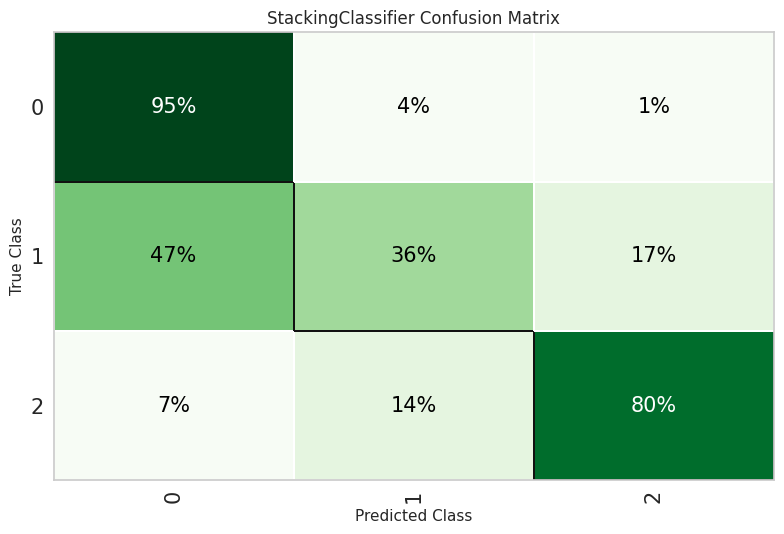

In [ ]:
exp.plot_model(stacker, plot="confusion_matrix", plot_kwargs={"percent": True})

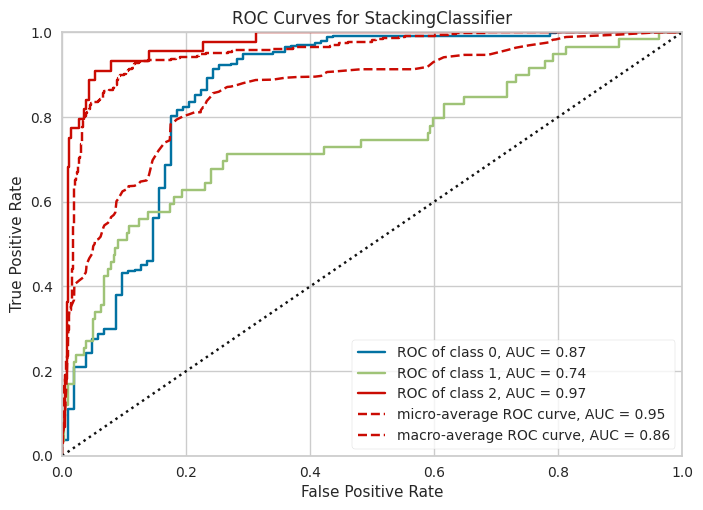

In [ ]:
exp.plot_model(stacker, plot="auc")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

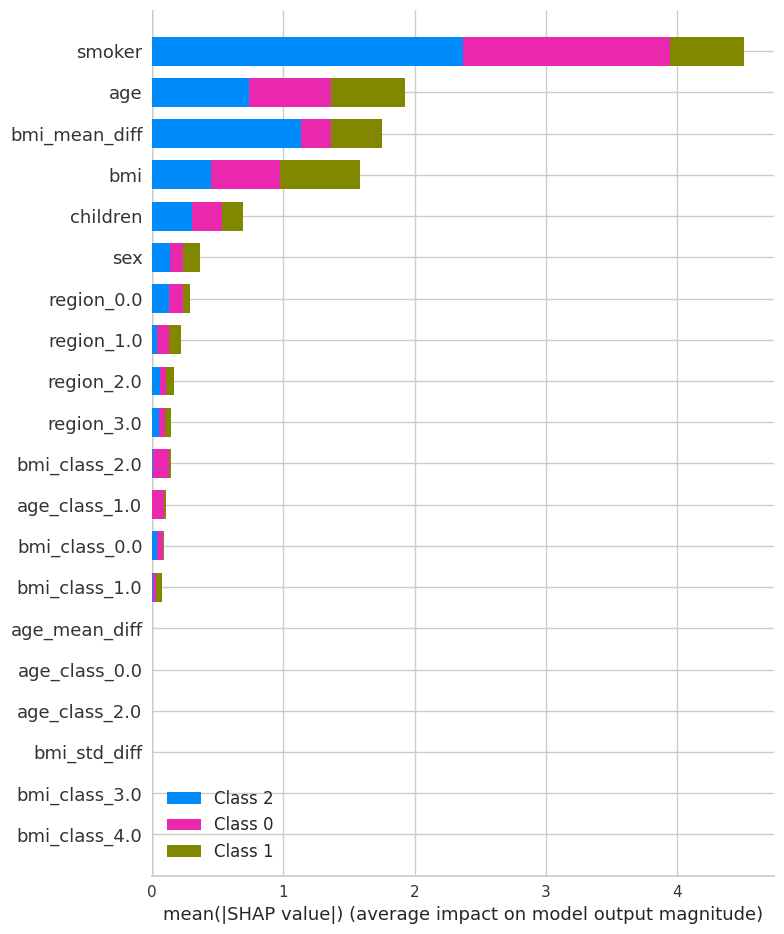

In [ ]:
exp.interpret_model(xgb)

In [ ]:
exp.predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8562,0.8745,0.8562,0.8485,0.8514,0.5945,0.5953


,age,sex,bmi,children,smoker,region,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_square,age_class,age_mean_diff,age_std_diff,age_square,charges,prediction_label,prediction_score
4,45,1,29.641853,1,0,2,1,2.831379,-23.842060,878.639465,1,-5.966,-31.558899,2025,0,0,0.9202
1330,62,0,29.168848,1,0,1,1,3.304385,-23.369053,850.821655,1,-22.966,-48.558899,3844,0,0,0.8485
759,18,0,38.414867,0,0,0,2,-5.941635,-32.615074,1475.702026,0,21.034,-4.558900,324,0,0,0.9465
171,18,0,24.867525,0,0,3,4,7.605707,-19.067732,618.393860,0,21.034,-4.558900,324,0,0,0.9840
768,26,0,23.475975,1,0,3,4,8.997257,-17.676182,551.121399,0,13.034,-12.558900,676,0,0,0.9841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,52,1,28.703035,0,0,2,1,3.770198,-22.903242,823.864258,1,-12.966,-38.558899,2704,1,0,0.9026
289,53,0,24.096882,3,0,2,4,8.376351,-18.297087,580.659668,1,-13.966,-39.558899,2809,0,0,0.9484
107,59,1,28.884178,0,0,1,1,3.589056,-23.084383,834.295715,1,-19.966,-45.558899,3481,0,0,0.8574
1157,44,1,29.757326,0,0,1,1,2.715906,-23.957533,885.498474,1,-4.966,-30.558899,1936,0,0,0.9163


In [ ]:
exp.predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8500,0.8628,0.8500,0.8351,0.8411,0.5631,0.5653


,age,sex,bmi,children,smoker,region,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_square,age_class,age_mean_diff,age_std_diff,age_square,charges,prediction_label,prediction_score
4,45,1,29.641853,1,0,2,1,2.831379,-23.842060,878.639465,1,-5.966,-31.558899,2025,0,0,0.9972
1330,62,0,29.168848,1,0,1,1,3.304385,-23.369053,850.821655,1,-22.966,-48.558899,3844,0,1,0.6027
759,18,0,38.414867,0,0,0,2,-5.941635,-32.615074,1475.702026,0,21.034,-4.558900,324,0,0,0.9609
171,18,0,24.867525,0,0,3,4,7.605707,-19.067732,618.393860,0,21.034,-4.558900,324,0,0,0.9978
768,26,0,23.475975,1,0,3,4,8.997257,-17.676182,551.121399,0,13.034,-12.558900,676,0,0,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,52,1,28.703035,0,0,2,1,3.770198,-22.903242,823.864258,1,-12.966,-38.558899,2704,1,0,0.8729
289,53,0,24.096882,3,0,2,4,8.376351,-18.297087,580.659668,1,-13.966,-39.558899,2809,0,0,0.9945
107,59,1,28.884178,0,0,1,1,3.589056,-23.084383,834.295715,1,-19.966,-45.558899,3481,0,0,0.7458
1157,44,1,29.757326,0,0,1,1,2.715906,-23.957533,885.498474,1,-4.966,-30.558899,1936,0,0,0.9916


In [ ]:
exp.predict_model(stacker)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8625,0.8599,0.8625,0.8497,0.8545,0.5995,0.6018


,age,sex,bmi,children,smoker,region,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_square,age_class,age_mean_diff,age_std_diff,age_square,charges,prediction_label,prediction_score
4,45,1,29.641853,1,0,2,1,2.831379,-23.842060,878.639465,1,-5.966,-31.558899,2025,0,0,0.9896
1330,62,0,29.168848,1,0,1,1,3.304385,-23.369053,850.821655,1,-22.966,-48.558899,3844,0,0,0.9058
759,18,0,38.414867,0,0,0,2,-5.941635,-32.615074,1475.702026,0,21.034,-4.558900,324,0,0,0.9875
171,18,0,24.867525,0,0,3,4,7.605707,-19.067732,618.393860,0,21.034,-4.558900,324,0,0,0.9900
768,26,0,23.475975,1,0,3,4,8.997257,-17.676182,551.121399,0,13.034,-12.558900,676,0,0,0.9845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,52,1,28.703035,0,0,2,1,3.770198,-22.903242,823.864258,1,-12.966,-38.558899,2704,1,0,0.9364
289,53,0,24.096882,3,0,2,4,8.376351,-18.297087,580.659668,1,-13.966,-39.558899,2809,0,0,0.9945
107,59,1,28.884178,0,0,1,1,3.589056,-23.084383,834.295715,1,-19.966,-45.558899,3481,0,0,0.9360
1157,44,1,29.757326,0,0,1,1,2.715906,-23.957533,885.498474,1,-4.966,-30.558899,1936,0,0,0.9853


In [ ]:
tuned_stacker = exp.tune_model(stacker, choose_better=True, fold=5, n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8973,0.9052,0.8973,0.8988,0.8899,0.7053,0.7104
1,0.8438,0.9227,0.8438,0.8264,0.8332,0.5250,0.5299
2,0.8661,0.8863,0.8661,0.8475,0.8519,0.5862,0.5957
3,0.8973,0.9579,0.8973,0.8924,0.8852,0.7003,0.7076
4,0.8795,0.8729,0.8795,0.8745,0.8767,0.6618,0.6624
Mean,0.8768,0.9090,0.8768,0.8679,0.8674,0.6357,0.6412
Std,0.0203,0.0297,0.0203,0.0273,0.0215,0.0699,0.0694


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
tuned_out = exp.predict_model(tuned_stacker)

f1_score(tuned_out["charges"], tuned_out["prediction_label"], average="macro")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8625,0.8729,0.8625,0.8474,0.8523,0.5981,0.6014


0.7000698804190585

In [ ]:
final_model = exp.finalize_model(tuned_stacker)

In [ ]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'bmi', 'children',
                                             'bmi_mean_diff', 'bmi_std_diff',
                                             'bmi_square', 'age_mean_diff',
                                             'age_std_diff', 'age_square'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean...
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               objective='multi:softprob', ...))],
                                    final_estimator=<catboost.core.CatBoostClassifier object at 0x7f9413f14760>,
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0))],
         verbose=False)

In [ ]:
exp.predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9229,0.9819,0.9229,0.9288,0.9113,0.7601,0.7769


,age,sex,bmi,children,smoker,region,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_square,age_class,age_mean_diff,age_std_diff,age_square,charges,prediction_label,prediction_score
4,45,1,29.641853,1,0,2,1,2.831379,-23.842060,878.639465,1,-5.966,-31.558899,2025,0,0,0.3491
1330,62,0,29.168848,1,0,1,1,3.304385,-23.369053,850.821655,1,-22.966,-48.558899,3844,0,0,0.3486
759,18,0,38.414867,0,0,0,2,-5.941635,-32.615074,1475.702026,0,21.034,-4.558900,324,0,0,0.3493
171,18,0,24.867525,0,0,3,4,7.605707,-19.067732,618.393860,0,21.034,-4.558900,324,0,0,0.3496
768,26,0,23.475975,1,0,3,4,8.997257,-17.676182,551.121399,0,13.034,-12.558900,676,0,0,0.3495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,52,1,28.703035,0,0,2,1,3.770198,-22.903242,823.864258,1,-12.966,-38.558899,2704,1,0,0.3400
289,53,0,24.096882,3,0,2,4,8.376351,-18.297087,580.659668,1,-13.966,-39.558899,2809,0,0,0.3494
107,59,1,28.884178,0,0,1,1,3.589056,-23.084383,834.295715,1,-19.966,-45.558899,3481,0,0,0.3482
1157,44,1,29.757326,0,0,1,1,2.715906,-23.957533,885.498474,1,-4.966,-30.558899,1936,0,0,0.3494


In [ ]:
lb = exp.get_leaderboard()
lb.sort_values(by="F1", ascending=False)

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8768,0.0000,0.8768,0.8743,0.8720,0.6458,0.6502
17,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8768,0.0000,0.8768,0.8743,0.8720,0.6458,0.6502
25,Stacking Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8768,0.9090,0.8768,0.8679,0.8674,0.6357,0.6412
18,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8714,0.0000,0.8714,0.8707,0.8673,0.6405,0.6440
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8714,0.0000,0.8714,0.8707,0.8673,0.6405,0.6440
10,Linear Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.8696,0.0000,0.8696,0.8676,0.8670,0.6357,0.6377
26,Stacking Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8696,0.9086,0.8696,0.8629,0.8638,0.6178,0.6213
9,Gradient Boosting Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8679,0.0000,0.8679,0.8617,0.8617,0.6182,0.6217
24,Stacking Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8688,0.8998,0.8688,0.8609,0.8610,0.6124,0.6185


In [ ]:
res_pd = exp.predict_model(final_model, data=test_data)

res = pl.from_pandas(res_pd).select(
    pl.col("id"), pl.col("prediction_label").alias("charges")
)

In [ ]:
res.write_csv(datasets_path / "predict.csv", include_header=False)